In [2]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

In [3]:
# Stats
from scipy import stats

In [4]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [5]:
dataset1 = randn(100)

(array([  2.,   1.,  10.,  10.,  14.,  18.,  19.,  13.,  11.,   2.]),
 array([-2.82232086, -2.32848316, -1.83464545, -1.34080774, -0.84697004,
        -0.35313233,  0.14070538,  0.63454308,  1.12838079,  1.62221849,
         2.1160562 ]),
 <a list of 10 Patch objects>)

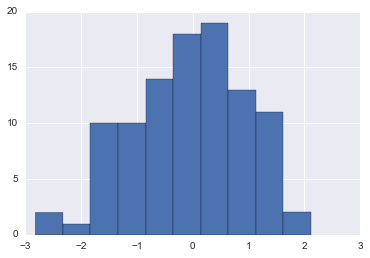

In [6]:
plt.hist(dataset1)

(array([  2.,   7.,   8.,   8.,  17.,  13.,   6.,   9.,   7.,   3.]),
 array([-2.21908326, -1.76983538, -1.3205875 , -0.87133961, -0.42209173,
         0.02715615,  0.47640403,  0.92565191,  1.37489979,  1.82414767,
         2.27339555]),
 <a list of 10 Patch objects>)

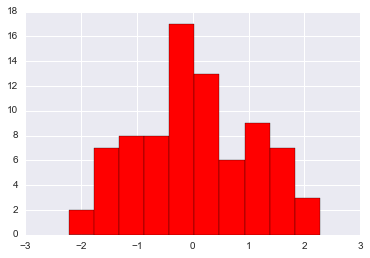

In [7]:
dataset2 = randn(80)
plt.hist(dataset2,color='red')

(array([ 0.11129713,  0.        ,  0.27824283,  0.11129713,  0.11129713,
         0.33389139,  0.22259426,  0.22259426,  0.38953996,  0.55648565,
         0.38953996,  0.33389139,  0.1669457 ,  0.1669457 ,  0.33389139,
         0.1669457 ,  0.27824283,  0.11129713,  0.05564857,  0.11129713]),
 array([-2.21908326, -1.99445932, -1.76983538, -1.54521144, -1.3205875 ,
        -1.09596355, -0.87133961, -0.64671567, -0.42209173, -0.19746779,
         0.02715615,  0.25178009,  0.47640403,  0.70102797,  0.92565191,
         1.15027585,  1.37489979,  1.59952373,  1.82414767,  2.04877161,
         2.27339555]),
 <a list of 20 Patch objects>)

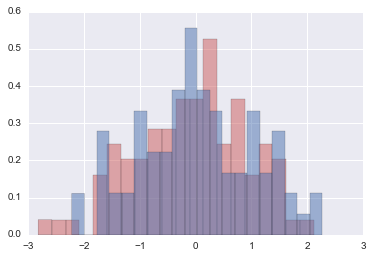

In [8]:
plt.hist(dataset1,normed=True,color='indianred',alpha=.5,bins=20)
plt.hist(dataset2,normed=True,alpha=.5,bins=20)

In [10]:
data1 = randn(1000)
data2 = randn(1000)

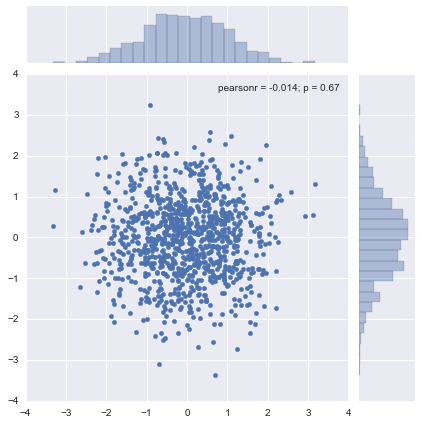

In [11]:
sns.jointplot(data1,data2)

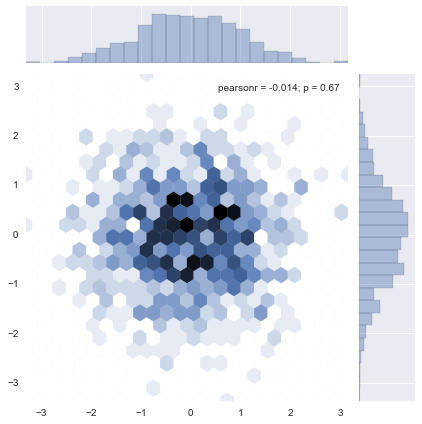

In [12]:
sns.jointplot(data1,data2,kind='hex')

In [13]:
dataset = randn(25)

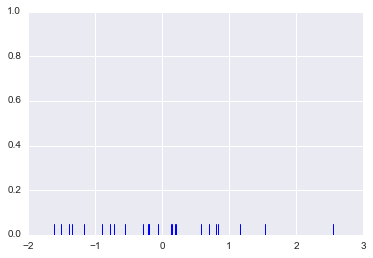

In [14]:
sns.rugplot(dataset)

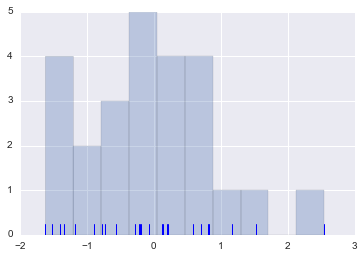

In [15]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

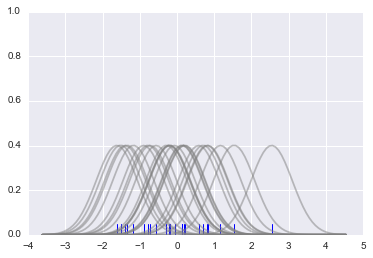

In [17]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)

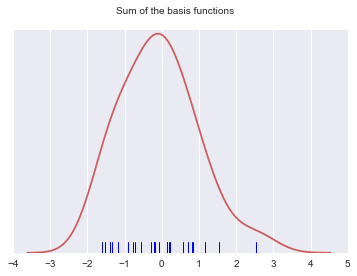

In [18]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

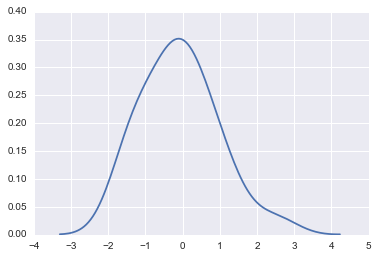

In [19]:
sns.kdeplot(dataset)

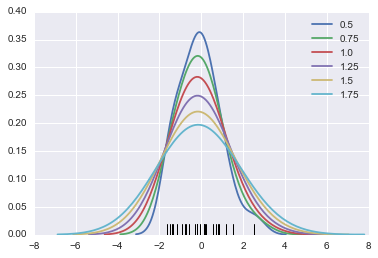

In [20]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

# Combining Plot Styles

In [6]:
dataset = randn(100)

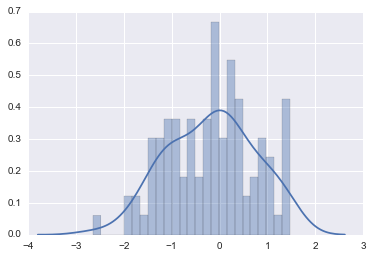

In [7]:
sns.distplot(dataset,bins=25)

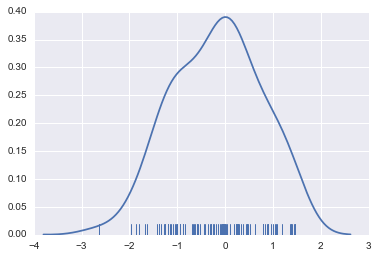

In [8]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

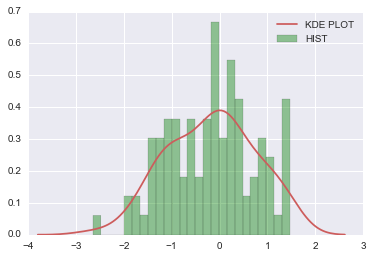

In [10]:
sns.distplot(dataset,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'green','label':'HIST'})

In [12]:
from pandas import Series

ser1 = Series(dataset,name='My data')
ser1

0     0.521413
1    -1.388892
2     0.783288
3    -0.315852
4     0.327458
5     0.247084
6    -1.978551
7     1.085183
8    -0.681283
9    -1.427702
10    1.366580
11   -0.933895
12    0.463034
13   -0.578739
14   -0.528325
15   -0.291650
16   -0.682504
17    0.473665
18    1.467844
19    0.870865
20   -0.005424
21   -0.029816
22    0.622759
23   -0.296413
24   -1.277967
25   -0.936137
26   -1.381202
27   -0.035146
28   -2.645281
29    0.823663
        ...   
70   -0.876358
71   -1.680178
72   -0.147928
73    0.186085
74   -0.055854
75   -0.360203
76    0.231440
77   -0.452102
78   -0.060375
79    0.461163
80    0.435938
81   -1.202611
82   -0.654092
83    0.368720
84   -0.635443
85   -0.415666
86   -1.381716
87    0.030594
88    0.242418
89    0.956761
90   -0.025664
91   -0.877228
92    0.271575
93   -1.195222
94    1.347285
95   -0.998727
96    1.443234
97   -1.124691
98    0.221745
99   -0.250983
Name: My data, dtype: float64

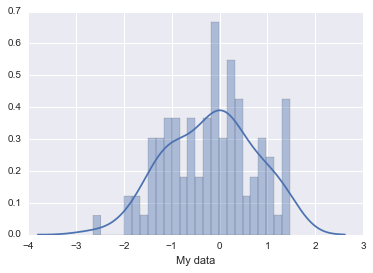

In [13]:
sns.distplot(ser1,bins=25)

# Box and Violin Plots

In [14]:
data1 = randn(100)
data2 = randn(100)

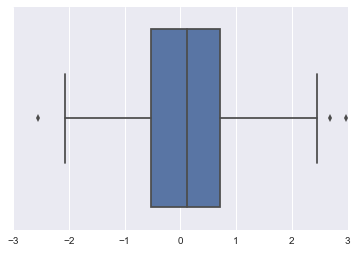

In [16]:
sns.boxplot([data1,data2])

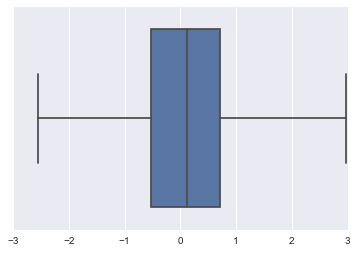

In [17]:
sns.boxplot([data1,data2],whis=np.inf)

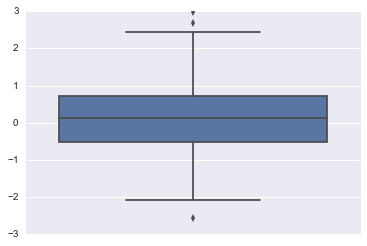

In [29]:
sns.boxplot([data1,data2],orient='v')

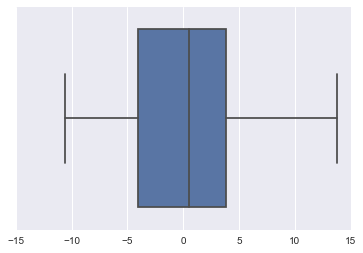

In [30]:
# Normal dist
data1 = stats.norm(0,5).rvs(100)

# Two gamma dist. Concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

# Box plot both data1 and data2
sns.boxplot([data1,data2],whis=np.inf)

In [36]:
data1 = pd.Series(data1)
data2 = pd.Series(data2)

In [43]:
data = pd.concat([data1,data2],axis=1)
data

,0,1
0,-5.766970,1.743094
1,2.570052,1.246486
2,2.503053,3.391449
3,3.224787,0.494347
4,1.937185,6.820976
5,0.930698,6.811238
6,-0.813750,4.635080
7,7.502784,2.962358
8,6.995960,4.150815
9,4.258300,1.466298


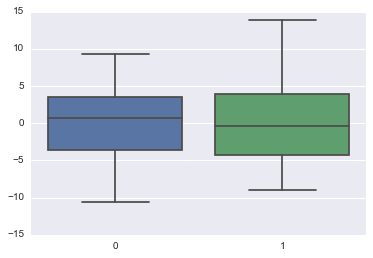

In [45]:
sns.boxplot(data=data,whis=np.inf)

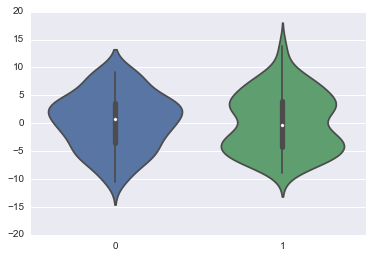

In [47]:
sns.violinplot(data=data)

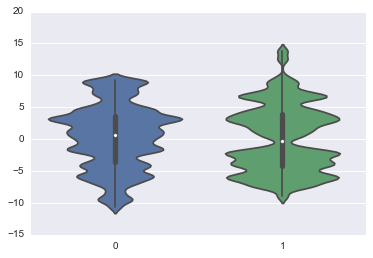

In [52]:
sns.violinplot(data=[data1,data2],bw=0.1)

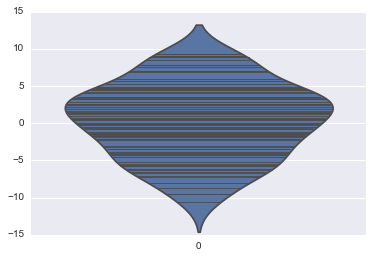

In [51]:
sns.violinplot(data=data1,inner='stick')

# Regression Plots

In [53]:
tips = sns.load_dataset('tips')

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


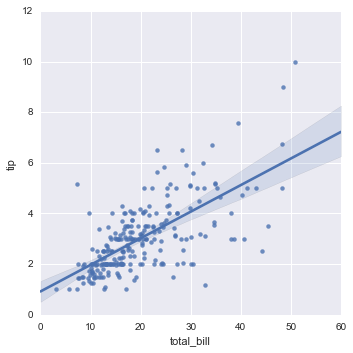

In [55]:
sns.lmplot('total_bill','tip',tips)

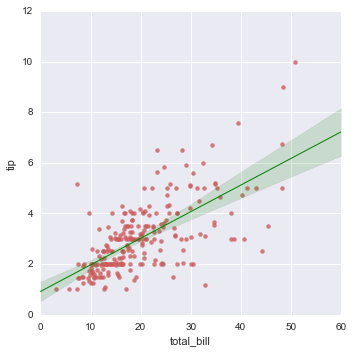

In [58]:
sns.lmplot('total_bill','tip',tips,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'green'})